In [97]:
token='44a1adeb-acd8-4167-9dc3-9006b9dda656'
json_str='{"studyIds":["tianhua_system_DX1890"],"pageSize":999999,"pageIndex":1,"attributesRangeFilters":[],"attributesEqualFilters":[],"mutationFilter":{"hugoGeneSymbols":[],"exacStart":0,"exadEnd":1,"vabundStart":0,"vabundEnd":1,"variantSource":[],"variantType":[],"variantClass":[],"sequencer":[],"sequencerSource":[],"searchStr":""}}'
host='https://peta.bgi.com/api'

In [98]:
# 启动python环境，并载入包
tryCatch({
    library(reticulate)
    use_condaenv("r-reticulate")#peta生产环境可用，本地机未安
    library(maftools)
 },error=function(e){
     print(e)
 } )

In [99]:
# 调用pypeta获取数据
tryCatch({
    pypyta<- import("pypeta")
    peta<-pypyta$Peta(token=token,host=host)
    peta$set_data_restriction_from_json_string(json_str)
    mut<-peta$fetch_mutation_data()
    mut<-mut[which(mut$NCBI_Build != 'NA'),]
    cli<-peta$fetch_clinical_data()
    names(cli)[names(cli) =='sampleId'] <- 'Tumor_Sample_Barcode'
 },error=function(e){
     print(e)
 } )

In [100]:
#Reading MAF files
tryCatch({   
    laml = read.maf(maf = mut,clinicalData=cli,verbose = F)
 },error=function(e){
     print(e)
 } )

# 数据选择条件

In [101]:
#print selected data set
tryCatch({
    json<-import("json")
    json$loads(json_str)
    pypyta$filter_description(json_str)
 },error=function(e){
     print(e)
 } )

[1] "选取的研究数据集包括tianhua_system_DX1890。"

# 组学特征分析

## 临床特征分布

In [102]:
tryCatch({
     #shows clinical data associated with samples.
    getClinicalData(laml)
 },error=function(e){
     print(e)
 } )

CANCER_STAGE,CANCER_TYPE,GENETIC_TEST_RESULT,HRD_SCORE,MSI_STATUS,SAMPLE_COLLECTION_DATE,SAMPLE_COLLECTION_MONTH,SAMPLE_SOURCE_DOCTOR,SAMPLE_SOURCE_PATH,SAMPLE_TYPE_DETAILED,⋯,ALCOHOL_HISTORY,FAMILY_HISTORY_OF_CANCER,PATHOLOGICAL_DIAGNOSIS,SEX,TUMOR_METASTASIS_STATUS,patientId,Tumor_Sample_Barcode,studyId,HOSPITAL_DEPARTMENT,PERSONAL_HISTORY
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
IV;IV;IV,卵巢癌;卵巢癌;卵巢癌,阳性,-22.09,MSS,2020-07-15,2020-07,王珂,天津市肿瘤医院,石蜡切片,⋯,放化疗史:2020-7-1化疗;靶向药物史:贝伐单抗;吸烟史:0;放化疗史:2020-7-1化疗;靶向药物史:贝伐单抗;吸烟史:0;放化疗史:2020-7-1化疗;靶向药物史:贝伐单抗;吸烟史:0,姐姐1肺癌，姐姐2乳腺癌;姐姐1肺癌，姐姐2乳腺癌;姐姐1肺癌，姐姐2乳腺癌,卵巢高级别浆液性癌;卵巢高级别浆液性癌;卵巢高级别浆液性癌,女,原发,19S3185741,19S3185741,tianhua_system_DX1890,NaN,NaN
III;III;III,卵巢癌;卵巢癌;卵巢癌,阳性,-28.96,MSS,2020-07-15,2020-07,李雷,中国医学科学院北京协和医院,组织,⋯,放化疗史:化疗三次;靶向药物史:无;吸烟史:0;放化疗史:化疗三次;靶向药物史:无;吸烟史:0;放化疗史:化疗三次;靶向药物史:无;吸烟史:0,母亲鼻咽癌83年去世;个人其他肿瘤史:不详;母亲鼻咽癌83年去世;个人其他肿瘤史:不详;母亲鼻咽癌83年去世;个人其他肿瘤史:不详,低级别浆液性卵巢癌;低级别浆液性卵巢癌;低级别浆液性卵巢癌,女,原发,20S2123870,20S2123870,tianhua_system_DX1890,妇科,NaN
不清楚;不清楚;不清楚,卵巢癌;卵巢癌;卵巢癌,阳性,31.3,MSS,2020-07-16,2020-07,潘凌亚,中国医学科学院北京协和医院,石蜡切片,⋯,放化疗史:2009-20108次化疗;靶向药物史:无;吸烟史:0;放化疗史:2009-20108次化疗;靶向药物史:无;吸烟史:0;放化疗史:2009-20108次化疗;靶向药物史:无;吸烟史:0,妈妈妇科疾病，姨娘妇科疾病;妈妈妇科疾病，姨娘妇科疾病;妈妈妇科疾病，姨娘妇科疾病,高级浆液型;高级浆液型;高级浆液型,女,原发,20S2123920,20S2123920,tianhua_system_DX1890,NaN,NaN
III;III;III,卵巢癌;卵巢癌;卵巢癌,阳性,59.91,MSS,2020-07-15,2020-07,李雷,中国医学科学院北京协和医院,组织,⋯,放化疗史:术前三次术后六次;靶向药物史:无;吸烟史:0;放化疗史:术前三次术后六次;靶向药物史:无;吸烟史:0;放化疗史:术前三次术后六次;靶向药物史:无;吸烟史:0,无;无;无,高级别浆液性卵巢癌;高级别浆液性卵巢癌;高级别浆液性卵巢癌,女,原发,20S2123924,20S2123924,tianhua_system_DX1890,NaN,NaN
IV,卵巢癌,阳性,44.9,MSS,2020-08-06,2020-08,无,湖南省肿瘤医院,石蜡切片,⋯,放化疗史:无;靶向药物史:无;吸烟史:0,无;个人其他肿瘤史:无,卵巢腺癌,女,原发,19S3200601,19S3200601,tianhua_system_DX1890,妇瘤科,NaN
I,卵巢癌,阳性,12.62,MSS,2020-08-10,2020-08,王辛,四川大学华西医院,石蜡切片,⋯,放化疗史:TC两次;靶向药物史:无;吸烟史:0,父亲，肺癌71岁;个人其他肿瘤史:无,透明细胞癌,女,原发,20S2449702,20S2449702,tianhua_system_DX1890,肿瘤科,NaN
IV,卵巢癌,阳性,17.64,MSS,2020-08-22,2020-08,吴鸣,中国医学科学院北京协和医院,石蜡切片,⋯,放化疗史:四次化疗;靶向药物史:贝伐两次;吸烟史:0,无;个人其他肿瘤史:无,卵巢癌,女,原发,20S2123955,20S2123955,tianhua_system_DX1890,妇瘤科,NaN
不清楚,卵巢癌,阳性,-25.51,MSS,2020-11-19,2020-11,无,肿瘤线上商城,石蜡切片,⋯,放化疗史:10.14最近一次化疗;靶向药物史:无;吸烟史:0,个人其他肿瘤史:无,卵巢癌,女,原发,20S8320973,20S8320973,tianhua_system_DX1890,无,NaN
III,卵巢癌,阳性,49.28,MSS,2020-11-26,2020-11,无,江西艾迪健康信息咨询服务有限公司,石蜡切片,⋯,放化疗史:无;靶向药物史:无;吸烟史:0,个人其他肿瘤史:无,原发,女,原发,20S10084701,20S10084701,tianhua_system_DX1890,无,NaN


## 样本级别变异分布 

In [103]:
tryCatch({
     #Shows sample summry.
    getSampleSummary(laml)
 },error=function(e){
     print(e)
 } )

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
20S2128382,0,1,2,0,35,2,1,41
19S3200601,0,0,12,0,23,0,1,36
20S10084701,0,1,3,0,18,1,2,25
20S11060808,3,0,3,0,16,0,2,24
20S11060826,0,0,1,0,18,0,1,20
20S8320828,0,0,0,0,17,3,0,20
20S11060799,0,0,0,1,16,1,0,18
20S11060805,0,0,1,0,16,0,1,18
20S12417159,1,1,0,0,13,1,2,18


## 基因水平变异分布

In [22]:
tryCatch({
     #Shows gene summary.
    getGeneSummary(laml)
 },error=function(e){
     print(e)
 } )

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
TP53,5,1,0,0,15,2,3,26,25,25
MUC16,0,0,1,0,8,0,0,9,7,7
ARID1A,3,0,2,0,1,0,0,6,6,6
KIAA1549,0,0,2,0,4,0,0,6,6,6
FAT4,0,0,0,0,6,0,0,6,5,5
FAT3,0,0,0,0,5,0,0,5,5,5
MAP3K4,1,0,0,0,4,0,0,5,5,5
ARID1B,1,0,3,0,1,0,0,5,4,4
COL22A1,0,0,0,0,5,0,0,5,4,4


In [95]:
#按照单个基因处理
genename <- unique(mut$Hugo_Symbol)
genename <- genename[1]
#colnames(mut)

## 变异分布特性图

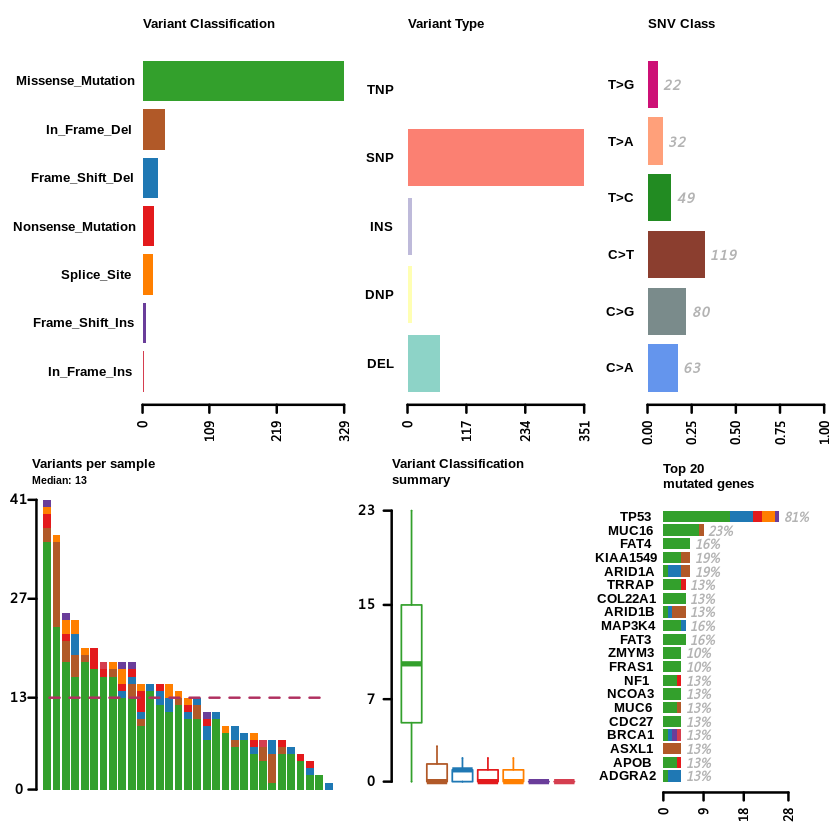

In [30]:
tryCatch({
      suppressMessages(suppressWarnings(plotmafSummary(maf = laml, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE, showBarcodes = FALSE,top=20)))
 },error=function(e){
     print(e)
 } )

## Ti/TV

NULL

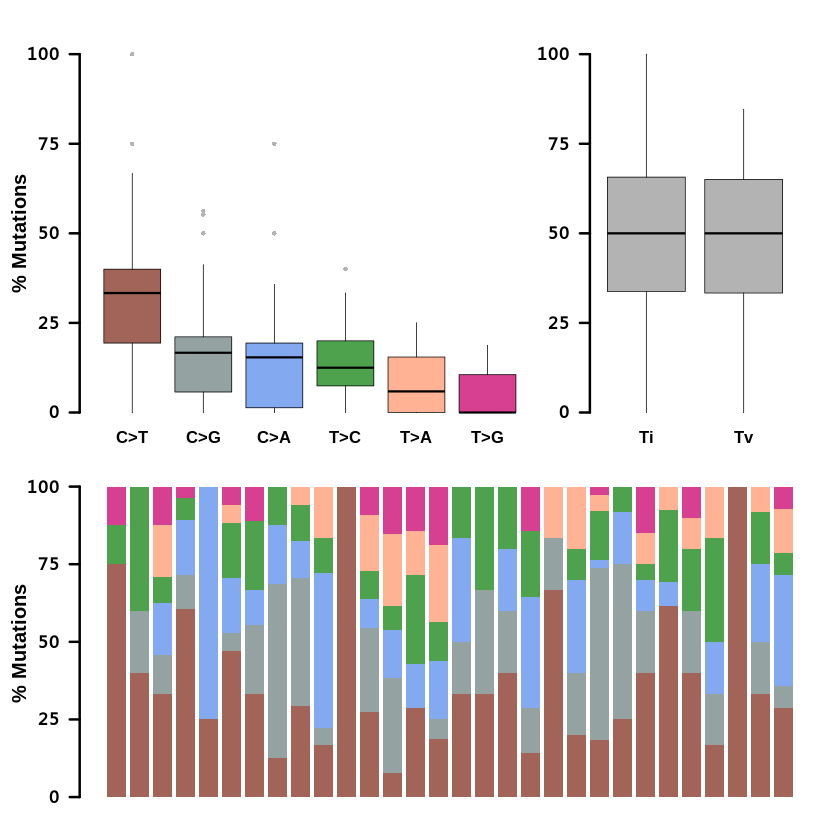

In [41]:
tryCatch({
     laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)
     suppressMessages(suppressWarnings(plotTiTv(res = laml.titv)))
 },error=function(e){
     print(e)
 } )

## 基因变异分布棒棒糖图

   HGNC    refseq.ID   protein.ID aa.length
1: TP53    NM_000546    NP_000537       393
2: TP53 NM_001126112 NP_001119584       393
3: TP53 NM_001126118 NP_001119590       354
4: TP53 NM_001126115 NP_001119587       261
5: TP53 NM_001126113 NP_001119585       346
6: TP53 NM_001126117 NP_001119589       214
7: TP53 NM_001126114 NP_001119586       341
8: TP53 NM_001126116 NP_001119588       209


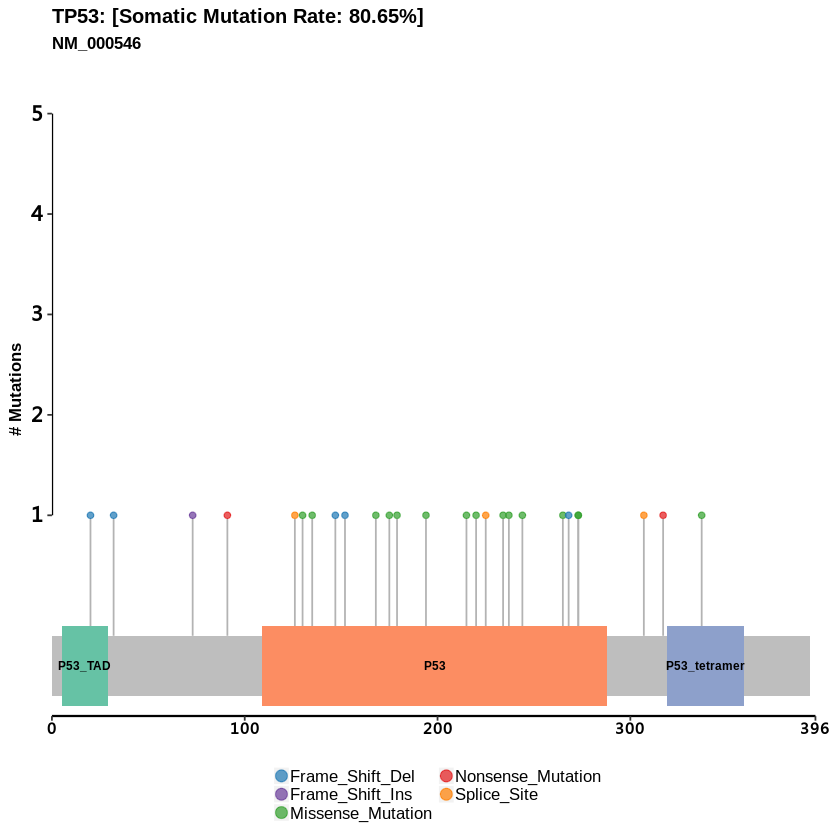

In [48]:
tryCatch({
     laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)
     suppressMessages(suppressWarnings(lollipopPlot(maf = laml, gene = genename,AACol = 'HGVSp_Short', showMutationRate = TRUE,
                    cBioPortal= FALSE)))
 },error=function(e){
     print(e)
 } )

## 生存曲线分析

### 总生存期（Overall survival，OS）

In [ ]:
#Survival analysis based on grouping of gene mutation status
if(("OS_STATUS" %in% colnames(cli)) & ("OS_MONTHS" %in% colnames(cli))){
    cli$OS_MONTHS<-as.numeric(cli$OS_MONTHS) * 30
    
    dd<-cli$OS_STATUS
    dd[dd == "DECEASED"] <- 1
    dd[dd == "LIVING"] <- 0
    cli$OS_STATUS <- dd
    
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'OS_MONTHS', Status = 'OS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("列名命名有误，请检查数据。")
}

### 无病生存期（Disease-free  survival，DFS）

In [94]:
#Survival analysis based on grouping of gene mutation status
if(("DFS_STATUS" %in% colnames(cli)) & ("DFS_MONTHS" %in% colnames(cli))){
    cli$DFS_MONTHS<-as.numeric(cli$DFS_MONTHS) * 30
    
    dd<-cli$DFS_STATUS
    dd[dd == "Recurred/Progressed"] <- 1
    dd[dd == "Recurred"] <- 1
    dd[dd == "DiseaseFree"] <- 0
    cli$DFS_STATUS <- dd
    
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'DFS_MONTHS', Status = 'DFS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("列名命名有误，请检查数据。")
}

### 无进展生存期（progression-free survival，PFS）

In [ ]:
#Survival analysis based on grouping of gene mutation status
if(("PFS_STATUS" %in% colnames(cli)) & ("PFS_MONTHS" %in% colnames(cli))){
    cli$PFS_MONTHS<-as.numeric(cli$PFS_MONTHS) * 30
    
    dd<-cli$PFS_STATUS
    dd[dd == "Recurred/Progressed"] <- 1
    dd[dd == "Recurred"] <- 1
    dd[dd == "DiseaseFree"] <- 0
    cli$PFS_STATUS <- dd
    
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'PFS_MONTHS', Status = 'PFS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("列名命名有误，请检查数据。")
}